In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [0]:
df = pd.read_csv('wood_removal_cubic_meters.csv')
df.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,2160000.0,2210000.0,2290000.0,2400000.0,2510000.0,2610000.0,2720000.0,2810000.0,2880000.0,...,3110000.0,3150000.0,3190000.0,3230000.0,3260000.0,3290000.0,3320000.0,3360000.0,3400000.0,3400000.0
1,Albania,2080000.0,2560000.0,2560000.0,595000.0,409000.0,409000.0,409000.0,409000.0,27700.0,...,305000.0,296000.0,296000.0,296000.0,296000.0,430000.0,430000.0,430000.0,430000.0,430000.0
2,Algeria,124000.0,172000.0,139000.0,239000.0,166000.0,194000.0,190000.0,203000.0,222000.0,...,121000.0,164000.0,184000.0,141000.0,141000.0,152000.0,121000.0,139000.0,135000.0,119000.0
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Angola,3190000.0,3280000.0,3380000.0,3670000.0,3750000.0,3780000.0,3840000.0,3930000.0,4050000.0,...,4420000.0,4500000.0,4580000.0,4670000.0,4750000.0,4840000.0,4920000.0,5010000.0,5110000.0,5200000.0


In [0]:
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1990,2.16e+06,2.08e+06,124000,0,3.19e+06,1.02e+07,NaN,2.08e+07,1.57e+07,NaN,...,6.35e+06,5.09e+08,3.91e+06,NaN,63200,NaN,3.12e+07,173000,7.12e+06,6.9e+06
1991,2.21e+06,2.56e+06,172000,0,3.28e+06,1.04e+07,NaN,2.04e+07,1.15e+07,NaN,...,6.37e+06,4.91e+08,4.02e+06,NaN,63200,NaN,3.16e+07,187000,7.32e+06,6.97e+06
1992,2.29e+06,2.56e+06,139000,0,3.38e+06,1.17e+07,NaN,2.07e+07,1.22e+07,NaN,...,6.41e+06,4.84e+08,4.2e+06,NaN,63200,NaN,3.12e+07,203000,7.52e+06,6.98e+06
1993,2.4e+06,595000,239000,0,3.67e+06,1.03e+07,NaN,2.19e+07,1.23e+07,NaN,...,6.71e+06,4.71e+08,4.42e+06,NaN,63200,NaN,3.12e+07,216000,7.73e+06,7e+06


In [0]:
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1990,2.16e+06,2.08e+06,124000,0,3.19e+06,1.02e+07,NaN,2.08e+07,1.57e+07,NaN,...,6.35e+06,5.09e+08,3.91e+06,NaN,63200,NaN,3.12e+07,173000,7.12e+06,6.9e+06
1991,2.21e+06,2.56e+06,172000,0,3.28e+06,1.04e+07,NaN,2.04e+07,1.15e+07,NaN,...,6.37e+06,4.91e+08,4.02e+06,NaN,63200,NaN,3.16e+07,187000,7.32e+06,6.97e+06
1992,2.29e+06,2.56e+06,139000,0,3.38e+06,1.17e+07,NaN,2.07e+07,1.22e+07,NaN,...,6.41e+06,4.84e+08,4.2e+06,NaN,63200,NaN,3.12e+07,203000,7.52e+06,6.98e+06
1993,2.4e+06,595000,239000,0,3.67e+06,1.03e+07,NaN,2.19e+07,1.23e+07,NaN,...,6.71e+06,4.71e+08,4.42e+06,NaN,63200,NaN,3.12e+07,216000,7.73e+06,7e+06
1994,2.51e+06,409000,166000,0,3.75e+06,1.08e+07,NaN,2.33e+07,1.44e+07,NaN,...,7.92e+06,4.73e+08,4.48e+06,NaN,63200,NaN,3.12e+07,233000,8.11e+06,8.14e+06


In [0]:
df = df.reset_index()
df.rename(index=str, columns={'index':'datetime'},inplace=True)

df.head()

country,datetime,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1990,2.16e+06,2.08e+06,124000,0,3.19e+06,1.02e+07,NaN,2.08e+07,1.57e+07,...,6.35e+06,5.09e+08,3.91e+06,NaN,63200,NaN,3.12e+07,173000,7.12e+06,6.9e+06
1,1991,2.21e+06,2.56e+06,172000,0,3.28e+06,1.04e+07,NaN,2.04e+07,1.15e+07,...,6.37e+06,4.91e+08,4.02e+06,NaN,63200,NaN,3.16e+07,187000,7.32e+06,6.97e+06
2,1992,2.29e+06,2.56e+06,139000,0,3.38e+06,1.17e+07,NaN,2.07e+07,1.22e+07,...,6.41e+06,4.84e+08,4.2e+06,NaN,63200,NaN,3.12e+07,203000,7.52e+06,6.98e+06
3,1993,2.4e+06,595000,239000,0,3.67e+06,1.03e+07,NaN,2.19e+07,1.23e+07,...,6.71e+06,4.71e+08,4.42e+06,NaN,63200,NaN,3.12e+07,216000,7.73e+06,7e+06
4,1994,2.51e+06,409000,166000,0,3.75e+06,1.08e+07,NaN,2.33e+07,1.44e+07,...,7.92e+06,4.73e+08,4.48e+06,NaN,63200,NaN,3.12e+07,233000,8.11e+06,8.14e+06


In [0]:
df['datetime'] = pd.to_datetime(df['datetime'])

df = df.set_index('datetime')

df.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
datetime,,,,,,,,,,,,,,,,,,,,,
1990-01-01,2.16e+06,2.08e+06,124000,0,3.19e+06,1.02e+07,NaN,2.08e+07,1.57e+07,NaN,...,6.35e+06,5.09e+08,3.91e+06,NaN,63200,NaN,3.12e+07,173000,7.12e+06,6.9e+06
1991-01-01,2.21e+06,2.56e+06,172000,0,3.28e+06,1.04e+07,NaN,2.04e+07,1.15e+07,NaN,...,6.37e+06,4.91e+08,4.02e+06,NaN,63200,NaN,3.16e+07,187000,7.32e+06,6.97e+06
1992-01-01,2.29e+06,2.56e+06,139000,0,3.38e+06,1.17e+07,NaN,2.07e+07,1.22e+07,NaN,...,6.41e+06,4.84e+08,4.2e+06,NaN,63200,NaN,3.12e+07,203000,7.52e+06,6.98e+06
1993-01-01,2.4e+06,595000,239000,0,3.67e+06,1.03e+07,NaN,2.19e+07,1.23e+07,NaN,...,6.71e+06,4.71e+08,4.42e+06,NaN,63200,NaN,3.12e+07,216000,7.73e+06,7e+06
1994-01-01,2.51e+06,409000,166000,0,3.75e+06,1.08e+07,NaN,2.33e+07,1.44e+07,NaN,...,7.92e+06,4.73e+08,4.48e+06,NaN,63200,NaN,3.12e+07,233000,8.11e+06,8.14e+06


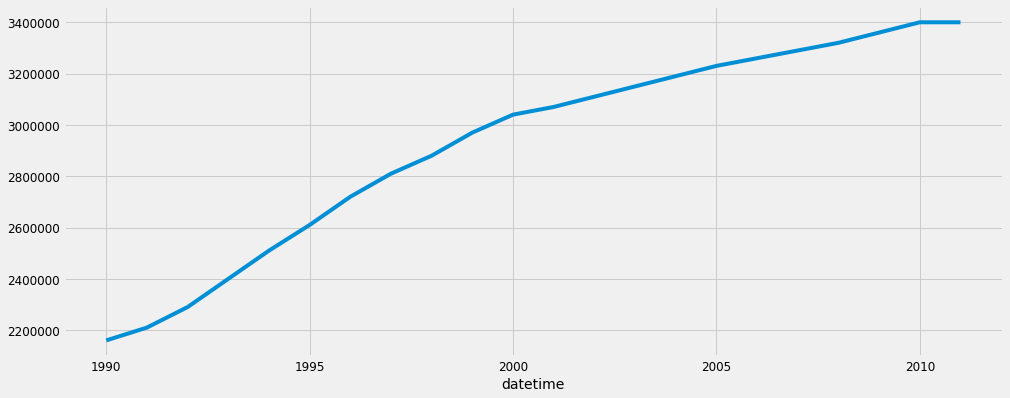

In [0]:
df['Afghanistan'].plot(figsize=(15,6));

In [0]:
df_pop = pd.read_csv('population_dnesity.csv', error_bad_lines=False)
df_env = pd.read_csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding = "ISO-8859-1")
df_lan = pd.read_csv('land_use_over_the_long_term_ourworldindata.csv')


df_pop.shape, df_env.shape, df_lan.shape

((264, 64), (9248, 65), (1036, 6))

In [0]:
df_pop2 = df_pop.T


In [0]:
df_pop2.drop(df_pop2.index[[1,2,3,4]], inplace=True)

new_header = df_pop2.iloc[0]
df_pop2 = df_pop2[1:]
df_pop2.columns = new_header
df_pop2.head()

df_pop2 = df_pop2.reset_index()
df_pop2.rename(index=str, columns={'index':'datetime'},inplace=True)

df_pop2['datetime']
df_pop2 = df_pop2.set_index('datetime')



df_pop.head(35)



,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,307.988889,312.361111,314.972222,316.844444,318.666667,...,564.827778,566.961111,569.872222,573.261111,576.638889,579.672222,582.344444,584.800000,NaN,NaN
1,Afghanistan,AFG,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,14.040934,14.315271,14.603367,14.905739,15.222887,...,44.118443,45.505314,47.019205,48.604123,50.176179,51.674929,53.083405,54.422205,NaN,NaN
2,Angola,AGO,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,4.614602,4.705271,4.796998,4.887560,4.975775,...,18.744791,19.426137,20.130063,20.853726,21.593379,22.346439,23.111786,23.890425,NaN,NaN
3,Albania,ALB,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,60.576642,62.456898,64.329234,66.209307,68.058066,...,106.314635,106.029015,105.854051,105.660292,105.441752,105.135146,104.967190,104.870693,NaN,NaN
4,Andorra,AND,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,30.585106,32.702128,34.919149,37.168085,39.465957,...,179.678723,178.193617,175.385106,171.889362,168.559574,165.987234,164.427660,163.755319,NaN,NaN
5,Arab World,ARB,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,8.459340,8.694114,8.936987,9.188763,9.449998,...,31.738140,32.484774,33.233563,33.981515,34.724074,35.459581,36.184943,36.900642,NaN,NaN
6,United Arab Emirates,ARE,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,1.423233,1.583667,1.768037,1.950563,2.117178,...,116.455703,122.113137,125.323191,126.813053,127.722712,128.897522,130.521149,132.359124,NaN,NaN
7,Argentina,ARG,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,7.656357,7.778624,7.900727,8.022074,8.142460,...,15.063412,15.221629,15.382356,15.544298,15.705657,15.865065,16.022067,16.176856,NaN,NaN
8,Armenia,ARM,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,68.194275,70.583983,72.974183,75.342396,77.671795,...,101.064665,101.003899,101.226625,101.633614,102.080084,102.456972,102.733263,102.931156,NaN,NaN
9,American Samoa,ASM,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,102.430000,105.585000,109.410000,113.490000,117.600000,...,278.185000,276.600000,276.150000,276.535000,277.185000,277.685000,277.995000,278.205000,NaN,NaN


(59, 264)

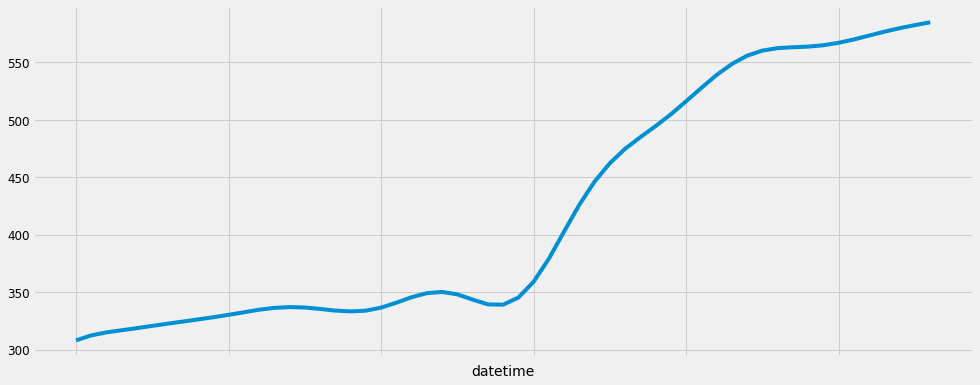

In [0]:
df_pop2['Aruba'].plot(figsize=(15,6));
df_pop2.shape

In [0]:
df_lan.head()

,Entity,Code,Year,Built-up Area (hectares),Grazing (hectares),Cropland (hectares)
0,Africa,NaN,-10000,1,0.0,0.000
1,Africa,NaN,-9000,2,0.0,0.000
2,Africa,NaN,-8000,4,0.0,0.000
3,Africa,NaN,-7000,7,0.0,7711.773
4,Africa,NaN,-6000,14,0.0,164918.400


In [0]:
df_dis = pd.read_csv('natural-disasters-by-type.csv')
df_air = pd.read_csv('PM25-air-pollution_ourworldindata.csv')
df_carb = pd.read_csv('SYB60_T25_Carbon Dioxide Emission Estimates.csv')
df_for = pd.read_csv('forest-area-as-share-of-land-area_ourworldindata_ByCountry.csv')

df_dis.shape, df_air.shape, df_carb.shape, df_for.shape

((828, 4), (2640, 4), (3309, 7), (1335, 4))

In [0]:
# Wont be using df_dis due to data not being complete
df_dis.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [0]:
df_air.head(12)

,Entity,Code,Year,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (micrograms per cubic meter)"
0,Afghanistan,AFG,1990,60.936690
1,Afghanistan,AFG,1995,56.136628
2,Afghanistan,AFG,2000,56.092028
3,Afghanistan,AFG,2005,43.234032
4,Afghanistan,AFG,2010,46.536809
5,Afghanistan,AFG,2011,50.483960
6,Afghanistan,AFG,2012,50.653945
7,Afghanistan,AFG,2013,50.968831
8,Afghanistan,AFG,2014,49.036091
9,Afghanistan,AFG,2015,62.080234


In [0]:
air = 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (micrograms per cubic meter)'

years = {'Entity':df_air.loc[df_air['Year']==1990].Entity.values, '1990': df_air.loc[df_air['Year'] == 1990][air].values,
        '1995': df_air.loc[df_air['Year'] == 1995][air].values, '2000': df_air.loc[df_air['Year'] == 2000][air].values,
        '2005': df_air.loc[df_air['Year'] == 2005][air].values,'2010': df_air.loc[df_air['Year'] == 2010][air].values,
        '2011': df_air.loc[df_air['Year'] == 2011][air].values,'2012': df_air.loc[df_air['Year'] == 2012][air].values,
        '2013': df_air.loc[df_air['Year'] == 2013][air].values,'2014': df_air.loc[df_air['Year'] == 2014][air].values,
        '2015': df_air.loc[df_air['Year'] == 2015][air].values,'2016': df_air.loc[df_air['Year'] == 2016][air].values}

df_air2 = pd.DataFrame(years)
df_air2.head()

,Entity,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,60.936690,56.136628,56.092028,43.234032,46.536809,50.483960,50.653945,50.968831,49.036091,62.080234,62.854857
1,Albania,17.796006,15.072604,14.320845,12.155814,15.335690,14.646135,14.562992,15.635917,16.748862,14.736548,14.634008
2,Algeria,34.023754,33.398080,32.211591,28.434431,26.709349,27.497075,28.209439,31.009854,33.080627,37.035728,37.230956
3,American Samoa,4.310769,4.295557,4.344943,4.303133,3.368691,3.255184,3.377271,3.457885,3.634140,3.790379,3.763412
4,Andorra,11.576245,11.363996,11.059773,11.219134,11.115808,11.230666,11.254432,10.942684,10.667695,10.908934,10.879472


In [0]:
df_air2 = df_air2.T

In [0]:
# Making header countries, which was on the first row
new_header = df_air2.iloc[0]
df_air2 = df_air2[1:]
df_air2.columns = new_header
df_air2.head()

# Making the index the datetime
df_air2 = df_air2.reset_index()
df_air2.rename(index=str, columns={'index':'datetime'},inplace=True)
df_air2 = df_air2.set_index('datetime')



df_air2.head()

Entity,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Upper middle income,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,World,Yemen,Zambia,Zimbabwe
datetime,,,,,,,,,,,,,,,,,,,,,
1990,60.9367,17.796,34.0238,4.31077,11.5762,36.8148,17.2755,53.1923,15.9126,20.7322,...,38.8764,13.0372,50.8619,10.1443,32.4139,26.78,39.5769,53.6357,32.4448,26.2731
1995,56.1366,15.0726,33.3981,4.29556,11.364,36.3457,17.384,51.8249,16.0588,17.1329,...,38.8059,13.0942,43.0825,10.3696,29.0423,26.9356,39.5107,53.2607,30.6239,24.8185
2000,56.092,14.3208,32.2116,4.34494,11.0598,39.7048,17.2612,52.904,15.6036,18.5639,...,40.1337,13.3398,40.1908,10.3111,32.5724,27.0897,40.4752,54.4871,30.8609,25.0885
2005,43.234,12.1558,28.4344,4.30313,11.2191,35.4045,16.3213,52.763,14.8203,21.3094,...,42.2098,11.9307,32.7738,11.253,28.8703,29.2276,41.8036,43.1276,28.237,25.4232
2010,46.5368,15.3357,26.7093,3.36869,11.1158,30.9217,13.3742,63.7917,14.2242,25.7208,...,42.7667,11.8024,37.1824,7.68692,22.7034,26.7607,41.8582,50.5285,26.4276,22.4804


In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_carb.head(20)

,T25,CO2 emission estimates,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
1,1,"Total, all countries or areas",1975,Emissions (thousand metric tons of carbon diox...,"16,853,532",NaN,Carbon Dioxide Information Analysis Center (CD...
2,1,"Total, all countries or areas",1985,Emissions (thousand metric tons of carbon diox...,"19,864,139",NaN,Carbon Dioxide Information Analysis Center (CD...
3,1,"Total, all countries or areas",1995,Emissions (thousand metric tons of carbon diox...,"23,120,435",NaN,Carbon Dioxide Information Analysis Center (CD...
4,1,"Total, all countries or areas",2005,Emissions (thousand metric tons of carbon diox...,"29,490,014",NaN,Carbon Dioxide Information Analysis Center (CD...
5,1,"Total, all countries or areas",2010,Emissions (thousand metric tons of carbon diox...,"33,472,376",NaN,Carbon Dioxide Information Analysis Center (CD...
6,1,"Total, all countries or areas",2012,Emissions (thousand metric tons of carbon diox...,"35,470,891",NaN,Carbon Dioxide Information Analysis Center (CD...
7,1,"Total, all countries or areas",2013,Emissions (thousand metric tons of carbon diox...,"35,837,591",NaN,Carbon Dioxide Information Analysis Center (CD...
8,1,"Total, all countries or areas",2014,Emissions (thousand metric tons of carbon diox...,"36,138,285",NaN,Carbon Dioxide Information Analysis Center (CD...
17,4,Afghanistan,1975,Emissions (thousand metric tons of carbon diox...,"2,127",NaN,Carbon Dioxide Information Analysis Center (CD...
18,4,Afghanistan,1985,Emissions (thousand metric tons of carbon diox...,"3,509",NaN,Carbon Dioxide Information Analysis Center (CD...


In [0]:
#df_carb = df_carb[1:]
df_carb = df_carb[df_carb['Unnamed: 3'] == 'Emissions (thousand metric tons of carbon dioxide)']

In [0]:
df_carb.loc[df_carb['Unnamed: 2']=='1975'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '1985'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '1995'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '2005'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '2010'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '2012'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '2013'].shape, df_carb.loc[df_carb['Unnamed: 2'] == '2014'].shape

((175, 7),
 (177, 7),
 (213, 7),
 (215, 7),
 (217, 7),
 (220, 7),
 (220, 7),
 (220, 7))

In [0]:
list(set(df_carb.loc[df_carb['Unnamed: 2'] == '1995']['CO2 emission estimates'].values) - set(df_carb.loc[df_carb['Unnamed: 2'] == '2014']['CO2 emission estimates'].values))

['Netherlands Antilles [former]',
 'Serbia and Monten. [former]',
 'Sudan [former]']

In [0]:
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Timor-Leste']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Wallis and Futuna Islands']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Montenegro']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Sint Maarten (Dutch part)']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Bonaire, St. Eustatius & Saba']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Curaçao']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'South Sudan']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Liechtenstein']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Serbia']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Liechtenstein']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Serbia']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Sudan']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Sudan [former]']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Serbia and Monten. [former]']
df_carb = df_carb[df_carb['CO2 emission estimates'] != 'Netherlands Antilles [former]']



In [0]:
col = 'Unnamed: 4'

years_carb = {'Countries':df_carb.loc[df_carb['Unnamed: 2']=='1995']['CO2 emission estimates'].values, '1995': df_carb.loc[df_carb['Unnamed: 2'] == '1995'][col].values,
        '2005': df_carb.loc[df_carb['Unnamed: 2'] == '2005'][col].values,'2010': df_carb.loc[df_carb['Unnamed: 2'] == '2010'][col].values,
        '2012': df_carb.loc[df_carb['Unnamed: 2'] == '2012'][col].values,'2013': df_carb.loc[df_carb['Unnamed: 2'] == '2013'][col].values,
        '2014': df_carb.loc[df_carb['Unnamed: 2'] == '2014'][col].values}

df_carb2 = pd.DataFrame(years_carb)

df_carb2.head()

,Countries,1995,2005,2010,2012,2013,2014
0,"Total, all countries or areas","23,120,435","29,490,014","33,472,376","35,470,891","35,837,591","36,138,285"
1,Afghanistan,"1,243","1,327","8,463","10,755","10,015","9,809"
2,Albania,"2,087","4,254","4,598","4,910","5,064","5,717"
3,Algeria,"95,294","107,278","119,178","129,988","134,465","145,400"
4,Andorra,425,576,517,488,477,462


In [0]:
df_carb2 = df_carb2.T

In [0]:
# Making header countries, which was on the first row
new_header = df_carb2.iloc[0]
df_carb2 = df_carb2[1:]
df_carb2.columns = new_header
df_carb2.head()

# Making the index the datetime
df_carb2 = df_carb2.reset_index()
df_carb2.rename(index=str, columns={'index':'datetime'},inplace=True)
df_carb2 = df_carb2.set_index('datetime')



df_carb2.head()

Countries,"Total, all countries or areas",Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia (Plurin. State of),Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Cayman Islands,Central African Republic,Chad,Chile,China,"China, Hong Kong SAR","China, Macao SAR",Colombia,Comoros,Congo,Cook Islands,Costa Rica,Côte d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Dem. People's Rep. Korea,Dem. Rep. of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Falkland Islands (Malvinas),Faroe Islands,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guadeloupe,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Lao People's Dem. Rep.,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Martinique,Mauritania,Mauritius,Mexico,Micronesia (Fed. States of),Mongolia,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Republic of Moldova,Réunion,Romania,Russian Federation,Rwanda,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Pierre and Miquelon,Saint Vincent & Grenadines,Samoa,Sao Tome and Principe,Saudi Arabia,Senegal,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,Spain,Sri Lanka,State of Palestine,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,TFYR of Macedonia,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Rep. of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Boliv. Rep. of),Viet Nam,Yemen,Zambia,Zimbabwe
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1995,"23,120,435","1,243","2,087","95,294",425,"10,975",66,275,"127,964","3,410","1,668","281,860","59,783","33,333","1,683","14,818","22,816",829,"60,773","112,328",378,"1,327",532,249,"9,850","3,429","3,047","258,347",84,"4,789","58,005",627,238,121,"1,551","4,228","467,638",363,235,110,"41,745","3,320,285","31,470","1,232","59,614",73,"1,566",40,"4,866","6,619","16,986","25,709","5,383","123,831","82,911","2,123","57,172",304,81,"15,885","22,842","95,723","5,027",128,935,"17,521","2,563",44,572,763,"52,713","349,161",583,429,"4,624",198,"2,303","864,110","5,277",275,"78,782",502,150,"1,463","7,165","1,291",183,"1,463",902,"3,880","60,370","1,947","811,562","224,941","272,942","74,348","32,970","51,100","430,484","9,179","1,183,447","13,557","169,166","7,554",29,"54,822","4,529",348,"9,443","13,579","1,709",326,"46,021","16,204","8,317","1,265",920,"121,132",249,469,"2,123",66,"1,639","1,074","1,830","332,817",106,"7,921",33,"30,374","1,115","6,960","1,632",106,"2,035","178,634","2,076","27,132","2,780",810,"35,841",7,"33,439","15,896","84,484",235,"2,985","2,061","3,964","23,883","60,711","344,214","51,870","31,789","374,771","11,192","1,764","126,049","1,631,474",462,11,128,312,70,128,117,48,"235,161","3,495",198,400,"42,174","42,115","14,404",143,590,"362,259","241,611","5,904",946,"2,065",455,"55,155","39,226","41,664","2,450","161,154","10,840",953,95,"17,022","15,735","171,975","34,000",48,7,939,"445,944","70,641","538,118","3,553"

In [0]:
# SO FAR WE HAVE THESE DATASETS:

df.shape, df_pop.shape, df_air2.shape, df_carb2.shape

((22, 177), (264, 64), (11, 240), (6, 210))

In [0]:
df_for.reset_index().head(7)

,index,Entity,Code,Year,15.1.1 - Forest area as a proportion of total land area - AG_LND_FRST - Percent (%)
0,0,Afghanistan,AFG,1990,2.07
1,1,Afghanistan,AFG,2000,2.07
2,2,Afghanistan,AFG,2005,2.07
3,3,Afghanistan,AFG,2010,2.07
4,4,Afghanistan,AFG,2015,2.07
5,5,Albania,ALB,1990,28.79
6,6,Albania,ALB,2000,28.08


In [0]:
col2 = '15.1.1 - Forest area as a proportion of total land area - AG_LND_FRST - Percent (%)'

years_for = {'Country':df_for.loc[df_for['Year']==1990]['Entity'].values, '1990': df_for.loc[df_for['Year'] == 1990][col2].values,
        '2000': df_for.loc[df_for['Year'] == 2000][col2].values,'2005': df_for.loc[df_for['Year'] == 2005][col2].values,
        '2010': df_for.loc[df_for['Year'] == 2010][col2].values,'2015': df_for.loc[df_for['Year'] == 2015][col2].values}

df_for2 = pd.DataFrame(years_for)

df_for2.head()

,Country,1990,2000,2005,2010,2015
0,Afghanistan,2.07,2.07,2.07,2.07,2.07
1,Albania,28.79,28.08,28.55,28.33,28.16
2,Algeria,0.70,0.66,0.64,0.81,0.82
3,American Samoa,91.94,90.25,89.41,88.56,87.72
4,Andorra,34.04,34.04,34.04,34.04,34.04


In [0]:
df_for2 = df_for2.T

In [0]:
# Making header countries, which was on the first row
new_header = df_for2.iloc[0]
df_for2 = df_for2[1:]
df_for2.columns = new_header
df_for2.head()

# Making the index the datetime
df_for2 = df_for2.reset_index()
df_for2.rename(index=str, columns={'index':'datetime'},inplace=True)
df_for2 = df_for2.set_index('datetime')



df_for2.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Australia and New Zealand,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Caribbean,Cayman Islands,Central African Republic,Central America,Central Asia,Central and Southern Asia,Chad,Chile,China,Colombia,Comoros,Congo,Cook Islands,Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czech Republic,Democratic Republic of Congo,Denmark,Djibouti,Dominica,Dominican Republic,Eastern Africa,Eastern Asia,Eastern Europe,Eastern and South-Eastern Asia,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Europe,Europe and Northern America,Faeroe Islands,Falkland Islands,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guadeloupe,Guam,Guatemala,Guernsey,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Japan,Jersey,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Landlocked developing countries,Laos,Latin America and the Caribbean,Latvia,Least developed countries,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Martinique,Mauritania,Mauritius,Mayotte,Melanesia,Mexico,Micronesia (country),Micronesia (region),Middle Africa,Moldova,Monaco,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,Norfolk Island,North Korea,Northern Africa,Northern Africa and Western Asia,Northern America,Northern Europe,Northern Mariana Islands,Norway,Oceania,Oceania (excluding Australia and New Zealand),Oman,Pakistan,Palau,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Pitcairn,Poland,Polynesia,Portugal,Puerto Rico,Qatar,Reunion,Romania,Russia,Rwanda,Saint Barthélemy,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Martin (French part),Saint Pierre and Miquelon,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Small island developing States,Solomon Islands,Somalia,South Africa,South America,South Korea,South Sudan,South-Eastern Asia,Southern Africa,Southern Europe,Spain,Sri Lanka,Sub-Saharan Africa,Sudan,Suriname,Svalbard and Jan Mayen Islands,Swaziland,Sweden,Switzerland,Syria,Tajikistan,Tanzania,Thailand,Timor,Togo,Tokelau,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Africa,Western Asia,Western Europe,Western Sahara,World,Yemen,Zambia,Zimbabwe
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990,2.07,28.79,0.7,91.94,34.04,48.91,61.11,23.41,12.71,11.88,2.33,16.73,17.39,45.81,10.31,51.45,0.28,11.48,14.65,37.5,22.37,70.85,52.08,20,65.76,57.97,43.33,24.21,65.41,24.73,78.37,30.65,25.03,11.25,73.33,51.44,38.3,14.33,22.27,52.92,36.21,39.46,3,9.45,5.32,20.53,16.67,58.06,26.34,66.55,61.02,50.22,32.14,33.06,19.33,17.43,34.05,70.74,12.8,0.24,66.67,22.87,34.54,18.1,47.14,28.54,58.91,0.04,18.19,66.31,16.05,52.04,13.79,44.91,40.31,0.06,0,52.16,71.98,26.36,99.71,15.03,85.38,44.2,39.61,32.41,37.91,0,25.59,0,49.97,43.56,46.3,44.31,2.56,29.56,78.81,84.63,4.21,72.71,19.73,0.16,21.51,68.98,4.91,1.85,6.75,6.06,6.1,25.8,31.82,68.45,5.22,1.1,1.27,8.3,15,0.19,4.38,18.15,76.45,51.26,

In [0]:
df.shape, df_pop.shape, df_air2.shape, df_carb2.shape, df_for2.shape

((22, 177), (264, 64), (11, 240), (6, 210), (5, 267))

In [0]:
plt.plot(df_pop['Brazil'][['1990','2000','2005','2010','2015']],df_for2['Brazil'])

plt.xlabel('Population density')
plt.ylabel('Forest area as a share of land')
plt.title("Increases in Brazil's population data correlate to a loss in forest area");

KeyError: ignored

In [0]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(df_for2['Brazil'].astype(float),
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            start_params = [0, 0, 1.]
            results = mod.fit(start_params)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ValueError: ignored

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

df_for.head()

,Entity,Code,Year,15.1.1 - Forest area as a proportion of total land area - AG_LND_FRST - Percent (%)
0,Afghanistan,AFG,1990,2.07
1,Afghanistan,AFG,2000,2.07
2,Afghanistan,AFG,2005,2.07
3,Afghanistan,AFG,2010,2.07
4,Afghanistan,AFG,2015,2.07


In [0]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

data = [go.Choropleth(
    locations = df_for.columns,
    z = df_for[df_for['Year'] == '2000']['15.1.1 - Forest area as a proportion of total land area - AG_LND_FRST - Percent (%)'],
    text = df_for.columns,
    colorscale = [
        [0, "rgb(5, 10, 172)"],
        [0.35, "rgb(40, 60, 190)"],
        [0.5, "rgb(70, 100, 245)"],
        [0.6, "rgb(90, 120, 245)"],
        [0.7, "rgb(106, 137, 247)"],
        [1, "rgb(220, 220, 220)"]
    ],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '$',
        title = 'GDP<br>Billions US$'),
)]

layout = go.Layout(
    title = 'Forest area as a share of land'
        ,
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    ),
    annotations = [go.layout.Annotation(
        x = 0.55,
        y = 0.1,
        xref = 'paper',
        yref = 'paper',
        text = 'Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
    )]
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename='world_forestation')

TypeError: ignored

In [0]:
df_final = pd.read_csv('deforestation_dataset_final.csv')
df_final.head(35)


,Unnamed: 0,country,code_x,year,forest_area_km_x,country_land_area_km_x,code_y,forest_propotion_to_land,country_population,wood_removal,temp_change,code,forest_area_km_y,country_land_area_km_y,total_land_usage
0,0,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,1.374,AFG,13500.0,652860.0,NaN
1,1,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,0.566,AFG,13500.0,652860.0,NaN
2,2,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,-0.196,AFG,13500.0,652860.0,NaN
3,3,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,-0.464,AFG,13500.0,652860.0,NaN
4,4,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,2.661,AFG,13500.0,652860.0,NaN
5,5,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,1.177,AFG,13500.0,652860.0,NaN
6,6,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,0.621,AFG,13500.0,652860.0,NaN
7,7,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,1.359,AFG,13500.0,652860.0,NaN
8,8,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,1.701,AFG,13500.0,652860.0,NaN
9,9,Afghanistan,AFG,1990,13500.0,652860.0,AFG,2.07,12249114.0,2160000.0,0.109,AFG,13500.0,652860.0,NaN


In [0]:
df_final = pd.read_csv('deforestation_dataset_final_V4.csv')

df_final.shape

df_final = df_final.pivot_table(values=['forest_area_km', 'country_land_area_km',
                                       'forest_propotion_to_land','country_population',
                                       'wood_removal', 'total_land_usage','carbon_emission', 'mean_yearly_exposure_pollution'],
                               index='year',
                               columns=['country'])

#df_final = df_final.stack(level='country')
df_final.head(35)

carbon_emission                                       \
country     Afghanistan  Albania   Algeria Andorra    Angola   
year                                                           
1990                NaN      NaN       NaN     NaN       NaN   
1991                NaN      NaN       NaN     NaN       NaN   
1992                NaN      NaN       NaN     NaN       NaN   
1993                NaN      NaN       NaN     NaN       NaN   
1994                NaN      NaN       NaN     NaN       NaN   
1995             621.55  1043.85  47648.70  215.80   5487.95   
1996                NaN      NaN       NaN     NaN       NaN   
1997                NaN      NaN       NaN     NaN       NaN   
1998                NaN      NaN       NaN     NaN       NaN   
1999                NaN      NaN       NaN     NaN       NaN   
2000                NaN      NaN       NaN     NaN       NaN   
2001                NaN      NaN       NaN     NaN       NaN   
2002                NaN      NaN       NaN     NaN       NaN   
2003                NaN      NaN       NaN     NaN       NaN   
2004                NaN      NaN       NaN     NaN       NaN   
2005             663.50  2127.70  53640.65  291.70   9578.60   
2006                NaN      NaN       NaN     NaN       NaN   
2007                NaN      NaN       NaN     NaN       NaN   
2008                NaN      NaN       NaN     NaN       NaN   
2009                NaN      NaN       NaN     NaN       NaN   
2010            4231.65  2299.80  59590.65  261.60  14529.20   
2011                NaN      NaN       NaN     NaN       NaN   
2012            5377.70  2455.85  64995.75  247.10  16700.25   
2013            5007.65  2532.90  67234.25  241.65  16309.70   
2014            4904.65  2859.50  72701.85  234.20  17382.20   
2015                NaN      NaN       NaN     NaN       NaN   

                                                                               \
country Antigua and Barbuda  Argentina  Armenia    Aruba  Australia   Austria   
year                                                                            
1990                    NaN        NaN      NaN      NaN        NaN       NaN   
1991                    NaN        NaN      NaN      NaN        NaN       NaN   
1992                    NaN        NaN      NaN      NaN        NaN       NaN   
1993                    NaN        NaN      NaN      NaN        NaN       NaN   
1994                    NaN        NaN      NaN      NaN        NaN       NaN   
1995                 139.50   63983.85  1705.55   844.40  140937.75  29895.25   
1996                    NaN        NaN      NaN      NaN        NaN       NaN   
1997                    NaN        NaN      NaN      NaN        NaN       NaN   
1998                    NaN        NaN      NaN      NaN        NaN       NaN   
1999                    NaN        NaN      NaN      NaN        NaN       NaN   
2000                    NaN        NaN      NaN      NaN        NaN       NaN   
2001                    NaN        NaN      NaN      NaN        NaN       NaN   
2002                    NaN        NaN      NaN      NaN        NaN       NaN   
2003                    NaN        NaN      NaN      NaN        NaN       NaN   
2004                    NaN        NaN      NaN      NaN        NaN       NaN   
2005                 217.05   81057.60  2177.20  1373.95  175095.10  37112.50   
2006                    NaN        NaN      NaN      NaN        NaN       NaN   
2007                    NaN        NaN      NaN      NaN        NaN       NaN   
2008                    NaN        NaN      NaN      NaN        NaN       NaN   
2009                    NaN        NaN      NaN      NaN        NaN       NaN   
2010                 265.00   93961.75  2109.20  1266.35  195439.80  33755.00   
2011                    NaN        NaN      NaN      NaN        NaN       NaN   
2012                 264.95   96180.30  2848.45   681.10  194071.45  31140.20   
2013                 264.90   94928.25  2749.

In [0]:
df_final['forest_area_km']['Brazil']


year
1990    5467050.0
1991    5441619.0
1992    5416188.0
1993    5390757.0
1994    5365326.0
1995    5339895.0
1996    5314464.0
1997    5289033.0
1998    5263602.0
1999    5238171.0
2000    5212740.0
2001    5183660.0
2002    5154580.0
2003    5125500.0
2004    5096420.0
2005    5067340.0
2006    5050788.0
2007    5034236.0
2008    5017684.0
2009    5001132.0
2010    4984580.0
2011    4974740.0
2012          NaN
2013          NaN
2014          NaN
2015          NaN
Name: Brazil, dtype: float64

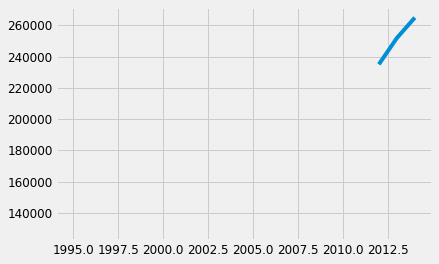

In [0]:
#plt.plot(df_final['forest_area_km']['United States'],df_final['wood_removal']['United States'])

#plt.plot(df_final['forest_area_km_x']['Brazil']/df_final['country_land_area_km_x']['Brazil'])

plt.plot(df_final['carbon_emission']['Brazil'])


In [0]:
df_final.columns



MultiIndex(levels=[['country_land_area_km_x', 'country_population', 'forest_area_km_x', 'forest_area_km_y', 'forest_propotion_to_land', 'temp_change', 'total_land_usage', 'wood_removal'], ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Cote d'Ivoire', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Domini

In [0]:
# Making list of 

# (Time, wood_removal), (Time, forest_area_km), (forest_area_km, wood_removal)





import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np
plotly.tools.set_credentials_file(username='joshdsolis', api_key='AzwXmZJ47jDGg2ZQRIwx')


N = 500
random_x = np.linspace(0, 1, N)
random_y = np.random.randn(N)

# Create a trace
trace = go.Scatter(
    x = df_final['forest_area_km']['United States'],
    y = df_final['wood_removal']['United States']
)

data = [trace]
layout = dict(title = 'There was more wood removal when there was less forest area',
              xaxis = dict(title = 'Wood removal (Cubic M)'),
              yaxis = dict(title = 'Forest area (km)'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

In [0]:
df_final2 = pd.read_csv('deforestation_dataset_final_V4.csv')


In [0]:
df_final2.head(35)

,Unnamed: 0,country,year,forest_propotion_to_land,country_population,wood_removal,code,forest_area_km,country_land_area_km,total_land_usage,percent_protected_land,carbon_emission,mean_yearly_exposure_pollution
0,0,Afghanistan,1990,2.07,12249114.0,2160000.0,AFG,13500.0,652860.0,NaN,NaN,NaN,60.936690
1,1,Afghanistan,1991,NaN,NaN,2210000.0,AFG,13500.0,652860.0,NaN,NaN,NaN,NaN
2,2,Afghanistan,1992,NaN,NaN,2290000.0,AFG,13500.0,652860.0,NaN,NaN,NaN,NaN
3,3,Afghanistan,1993,NaN,NaN,2400000.0,AFG,13500.0,652860.0,NaN,NaN,NaN,NaN
4,4,Afghanistan,1994,NaN,NaN,2510000.0,AFG,13500.0,652860.0,NaN,NaN,NaN,NaN
5,5,Afghanistan,1995,NaN,NaN,2610000.0,AFG,13500.0,652860.0,NaN,NaN,1243.0,56.136628
6,6,Afghanistan,1995,NaN,NaN,2610000.0,AFG,13500.0,652860.0,NaN,NaN,0.1,56.136628
7,7,Afghanistan,1996,NaN,NaN,2720000.0,AFG,13500.0,652860.0,NaN,NaN,NaN,NaN
8,8,Afghanistan,1997,NaN,NaN,2810000.0,AFG,13500.0,652860.0,NaN,NaN,NaN,NaN
9,9,Afghanistan,1998,NaN,NaN,2880000.0,AFG,13500.0,652860.0,NaN,NaN,NaN,NaN


In [0]:
# Making list of 

# (Time, wood_removal), (Time, forest_area_km), (forest_area_km, wood_removal)





import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np
plotly.tools.set_credentials_file(username='joshdsolis', api_key='AzwXmZJ47jDGg2ZQRIwx')


N = 500
random_x = np.linspace(0, 1, N)
random_y = np.random.randn(N)

# Create a trace
trace = go.Scatter(
    x = df_final.index,
    y = df_final['wood_removal']['United States']
)

data = [trace]
layout = dict(title = 'There has been less wood removal over time',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Wood removal (Cubic M)'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Wood_removal_USA')